# Taller modelos lineales


# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [ ]:
np.unique(income["Education-Num"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
np.unique(income["Hours per week"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99])

In [ ]:
income.shape

(32561, 15)

## Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



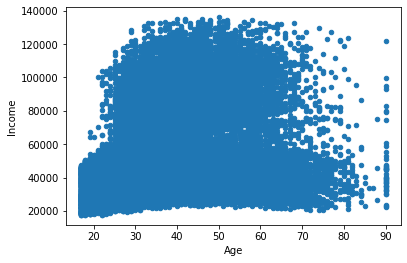

In [ ]:
income.plot(x='Age', y='Income', kind='scatter')

In [ ]:
#No se ve una clara relación entre la variable edad y la renta, muy levemente lineal.

## Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [ ]:
y = income['Income'].values
X = income['Age'].values

In [ ]:
#OLS

In [ ]:
# import
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

In [ ]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
print(X_)

[[ 1. 39.]
 [ 1. 50.]
 [ 1. 38.]
 ...
 [ 1. 58.]
 [ 1. 22.]
 [ 1. 52.]]


In [ ]:
# Fit
linreg.fit(X_, y)

LinearRegression(fit_intercept=False)

In [ ]:
linreg.coef_

array([32538.08813087,   542.16765707])

In [ ]:
#Usando el descenso gradiente
# import
from sklearn.linear_model import SGDRegressor
# Initialize
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)

In [ ]:
# Fit
linreg2.fit(X_, y)

SGDRegressor(fit_intercept=False, max_iter=500, tol=1e-07)

In [ ]:
linreg2.coef_

array([32699.58181248,   525.5425312 ])

In [ ]:
#Para un aumento del uno por ciento en la edad, la renta al año aumenta aproximadamente en 542.16 USD usando OLS y 525.54 USD usando descenso gradiente.

In [ ]:
#Predecir renta OLS
# y = B0 + B1*X1
y_40 = 32538.08813087 + 542.16765707*(40); y_40

54224.79441367

In [ ]:
y_30 = 32538.08813087 + 542.16765707*(30); y_30

48803.11784297

In [ ]:
#Predecir renta gradiente
# y = B0 + B1*X1

In [ ]:
y_40 = 32699.58181248 + 525.5425312*(40); y_40 #El ingreso anual que tendria una persona de 40 años seria igual a 54165.08 USD.

53721.28306048

In [ ]:
y_30 = 32699.58181248 + 525.5425312*(30); y_30 #El ingreso anual que tendria una persona de 30 años seria igual a 48465.85 USD.

48465.85774848


## Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [ ]:
income['Age2'] = income['Age'] ** 2

In [ ]:
#Usando OLS
X = income[['Age', 'Age2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]])

In [ ]:
X_ = np.c_[np.ones(n_samples), X]

In [ ]:
clf1 = LinearRegression()

In [ ]:
clf1.fit(income[['Age', 'Age2']], income['Income'])

LinearRegression()

In [ ]:
clf1.coef_

array([3131.77014151,  -30.54341041])

In [ ]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([-16225.07097408,   3131.77014151,    -30.54341041])

In [ ]:
x40_ = np.array([1,40, 40**2]); x40_ #Predecir 40 años

array([   1,   40, 1600])

In [ ]:
# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

In [ ]:
y_pred = lr_h(betas_ols, x40_)
y_pred

60176.27802691613

In [ ]:
x30_ = np.array([1,30, 30**2]); x30_ #Predecir 30 años

array([  1,  30, 900])

In [ ]:
y_pred = lr_h(betas_ols, x30_)
y_pred

50238.963900273826

In [ ]:
#Comparando con el modelo anterior se puede evidenciar que:
#En el modelo anterior para un individuo de 40 años su ingreso aproximadamente será de: 54224.79 USD mientras que para el modelo con la Edad al cuadrado
#el resultado es igual a 60176.27 USD. Será mucho más grande.
#Para un individuo de 30 años su renta aproximada sera igual a 48803.11 USD utilizando OLS con una variable explicativa (Edad). Para el modelo con la edad 
#y la edad al cuadrado este valor también será mucho mayor, igual a 50238.96.
#Segun ambos modelos un individuo con mayor edad tendra un mayor ingreso. 

## Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


In [ ]:
#Correlaciones
income.corr(method = "pearson")

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Age2
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.290408,0.980872
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.014618,-0.075042
Education-Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.430757,0.002446
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.214634,0.070423
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.147597,0.050144
Hours per week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.283949,0.000026
Income,0.290408,-0.014618,0.430757,0.214634,0.147597,0.283949,1.000000,0.231271
Age2,0.980872,-0.075042,0.002446,0.070423,0.050144,0.000026,0.231271,1.000000


In [ ]:
#Tomando como variable respuesta la renta y de acuerdo a la matriz de correlación lineal de pearson las variables 
#que podrian ser seleccionadas para la regresión son:
# - Hours per week, Age y depronto Capital Gain aunque su correlación no es tan fuerte. 
# Education-Num es numerica pero categorica para lo cual se deberia realizar un test de diferencia de medias del ingreso entre grupos (1-16), para 
#posteriormente realizar una codificación dummy y poder realizar una regresión.
# La edad al cuadrado no tiene sentido tomarla ya que un individuo no puede tener 1600 años.

In [ ]:
#Usando OLS, intentemos tomar aquellos que tienen correlaciones por encima del 28%
X = income[["Age", "Hours per week"]].values
X[0:5]

array([[39, 40],
       [50, 13],
       [38, 40],
       [53, 40],
       [28, 40]])

In [ ]:
X_ = np.c_[np.ones(n_samples), X]

In [ ]:
clf2 = LinearRegression()

In [ ]:
clf2.fit(income[['Age', 'Hours per week']], income['Income'])

LinearRegression()

In [ ]:
clf2.coef_

array([508.12166673, 547.02708774])

In [ ]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([11731.25479313,   508.12166673,   547.02708774])

In [ ]:
#Persona con 40 años que trabaja 48 horas por semana
x40_= np.array([1,40,48]); x40_ #Predecir 40 años

array([ 1, 40, 48])

In [ ]:
y_pred = lr_h(betas_ols, x40_)
y_pred
#Un individuo que trabaha 48 horas por semana y tiene 40 años aproximadamente puede llegar a tener una renta anual de 58313.42 USD.

58313.42167403994

In [ ]:
x30_= np.array([1,30,48]); x30_ #Predecir 30 años

array([ 1, 30, 48])

In [ ]:
y_pred = lr_h(betas_ols, x30_)
y_pred
#Un individuo que trabaja 48 horas por semana y tiene 30 años aproximadamente puede llegar a tener una renta anual de 53232.20 USD.

53232.205006703516

In [ ]:
x40_= np.array([1,40,25]); x40_ #Predecir 40 años con 25 horas por semana

array([ 1, 40, 25])

In [ ]:
y_pred = lr_h(betas_ols, x40_)
y_pred

45731.79865600041

In [ ]:
x40_= np.array([1,40,12]); x40_ #Predecir 40 años con 25 horas por semana
y_pred = lr_h(betas_ols, x40_)
y_pred

38620.44651536937

In [ ]:
#Comparando con el modelo anterior, al tener la variable "Horas que trabaja por semana" se puede decir que entre mayor número de horas, mayor será la renta 
#anual. Y entre menor sea su edad, menor ingreso tendrá el individuo. Por lo tanto, una persona que tiene 40 años y trabaja 48 horas a la semana ganará mas 
#que una persona de 30 años que trabaja 48 horas a la semana. 
#Un individuo que tiene 40 años y trabaja 25 horas a la semana ganará más aquel que solo trabaja 12 horas por semana.

#Comparando con el modelo anterior se puede evidenciar que:
#En el modelo anterior para un individuo de 40 años su ingreso aproximadamente será de: 54224.79 USD mientras que para el modelo tomando en cuenta 48 horas 
#de trabajo a la semana el ingreso aumenta a 58313.42 USD
#Para un individuo de 30 años su renta aproximada sera igual a 48803.11 USD utilizando OLS con una variable explicativa (Edad). Para el modelo actual
# este valor también será mucho mayor, igual a 53232.20 USD.


## Ejercicio 4.5

Utilizando las características seleccionadas en el punto anterior, parta la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión lineal usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule el MSE de test y el MSE de validación (10% restante) y compare los modelos.

In [ ]:
#Asegurar aleatoriedad
np.random.seed(123)
df_al = income.sample(frac=1).reset_index(drop=True)
df_al

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,55,State-gov,199713,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,15,United-States,55622.0
1,65,Private,115890,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,20,United-States,49963.0
2,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,39996.0
3,53,State-gov,231472,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,111278.0
4,32,Private,107218,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,50482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,55,Federal-gov,176904,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,53448.0
32557,33,State-gov,108116,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,45473.0
32558,19,Self-emp-not-inc,36012,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,50730.0
32559,23,Private,51985,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,38,United-States,31486.0


In [ ]:
#Entrenamiento y validación
32561 * 0.9

29304.9

In [ ]:
#Tomemos 29305 para entrenamiento y 3256 para validación

In [ ]:
income_train = df_al.iloc[0:29305] #Entrenamiento

In [ ]:
income_validation = df_al.iloc[29305:32561] #Validación

In [ ]:
y = income_train['Income'].values #Con los de entrenamiento
X = income_train[['Age', 'Hours per week']].values

In [ ]:
y_test = income_validation['Income'].values #Testeo
X_test = income_validation[['Age', 'Hours per week']].values

In [ ]:
#Estimar los modelos con el conjunto de entrenamiento
clf1_tt = LinearRegression()

In [ ]:
clf1_tt.fit(X,y)

LinearRegression()

In [ ]:
# Crear el metodo K fold CV  K = 2
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, random_state=666, shuffle=True)

In [ ]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1_tt, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [ ]:
#TEST MSE

In [ ]:
# Calcular el mse para el modelo 
print('MSE regresión:', abs(np.mean(scores)))

MSE regresión: 547636440.8125241


In [ ]:
# Estimar el modelo en cada uno de los k folds K = 5
cv = KFold(n_splits=5, random_state=666, shuffle=True)
scores = cross_val_score(clf1_tt, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [ ]:
print('MSE regresión:', abs(np.mean(scores)))

MSE regresión SGD: 547664788.0930269


In [ ]:
# Estimar el modelo en cada uno de los k folds K = 10
cv = KFold(n_splits=10, random_state=666, shuffle=True)
scores = cross_val_score(clf1_tt, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [ ]:
print('MSE regresión:', abs(np.mean(scores)))

MSE regresión: 547635065.6445756


In [ ]:
#Validación

In [ ]:
y_pred = clf1_tt.predict(X_test); y_pred

array([47742.09843758, 62091.75247338, 65059.131072  , ...,
       43309.81980154, 44239.20348764, 43309.81980154])

In [ ]:
X1 = income_validation[['Age','Hours per week']].values
n = income_validation.shape[0]
X2 = np.c_[np.ones(n), X1]
print(X2)

[[ 1. 44. 25.]
 [ 1. 56. 40.]
 [ 1. 51. 50.]
 ...
 [ 1. 19. 40.]
 [ 1. 23. 38.]
 [ 1. 19. 40.]]


In [ ]:
y_pred = pd.DataFrame(y_pred); y_pred

,0
0,47742.098438
1,62091.752473
2,65059.131072
3,58753.053654
4,59396.973038
...,...
3251,61584.132671
3252,50416.497029
3253,43309.819802
3254,44239.203488


In [ ]:
y_test

array([30157., 98687., 95791., ..., 50730., 31486., 29834.])

In [ ]:
y_real = income_validation[['Income']]; y_real

,Income
29305,30157.0
29306,98687.0
29307,95791.0
29308,77227.0
29309,65823.0
...,...
32556,53448.0
32557,45473.0
32558,50730.0
32559,31486.0


In [ ]:
y_real = y_real.reset_index(drop=True)

In [ ]:
y_pred.columns =['Income_pred']

In [ ]:
y_pred

,Income_pred
0,47742.098438
1,62091.752473
2,65059.131072
3,58753.053654
4,59396.973038
...,...
3251,61584.132671
3252,50416.497029
3253,43309.819802
3254,44239.203488


In [ ]:
f = (1/n)*(sum((y_real['Income'] - y_pred['Income_pred'])**2))
print('MSE regresión validación:', f )

MSE regresión validación: 555927289.2612332


El mejor MSE para los datos de entrenamiento es utilizando grupos de individuos de a 10. (Por medio del K fold cross validation MSE = 547.635.065).

Aplicando el modelo al grupo de validación el MSE arrojado fue igual a 555.927.289





#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data=data.rename(columns={'Churn?':'Churn'})
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.6

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn. (0-FAlse, 1-True)



Al ser una variable dicotomica, es decir, que solo puede tomar dos valores (de 1 y 0), La distribución que sigue la variable Churn es bernoulli

In [4]:
data['Churn_d']=data.Churn.map({'False.':0, 'True.':1})

# Ejercicio 4.7
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Intl Charge']
X = data[feature_cols]
y = data.Churn_d
logreg.fit(X, y)
data['Churn_pred'] = logreg.predict(X)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Churn_d,Churn_pred
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,0


Text(0, 0.5, 'Churn')

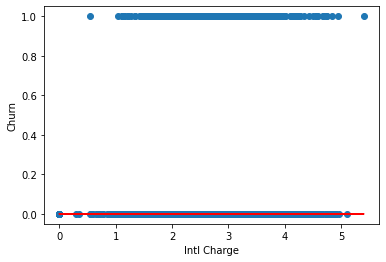

In [6]:
plt.scatter(data['Intl Charge'],data.Churn_d)
plt.plot(data['Intl Charge'], data.Churn_pred, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

El modelo obtenido usando como variable explicativa "IntlCharge" no es capaz de capturar el comportamiento de la variable "Churn", posiblemente porque la forma en que sus valores se distribuyen tiendan a ser 0 por la poca cantidad de casos donde Churn sea 1

# Ejercicio 4.8

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [7]:
feature_cols, logreg.coef_[0], logreg.intercept_

(['Intl Charge'], array([0.2624392]), array([-2.51428271]))

**Interpretación**: 
- Al tener la variable IntlCharge en 0, las probabilidades logaritmicas de "Churn" se reducen en 2.5142
- Un aumento de 1 unidad en "IntlCharge" se asocia con un aumento de 0.2624 unidades en las probabilidades logarítmicas de "Churn".

# Ejercicio 4.9

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


In [8]:
import seaborn as sns
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn', 'Churn_d', 'Churn_pred'],
      dtype='object')

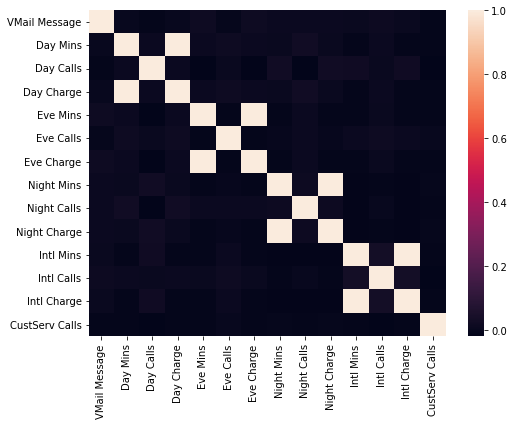

In [9]:
corr_df = data.drop(columns=['Int\'l Plan','VMail Plan','State', 'Account Length', 'Area Code', 'Churn', 'Churn_d', 'Churn_pred']).corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df)
plt.show()

In [10]:
pd.crosstab(data.Churn_d, data['VMail Plan'])

VMail Plan,no,yes
Churn_d,,
0,2008,842
1,403,80


In [11]:
pd.crosstab(data.Churn_d, data['Int\'l Plan'])

Int'l Plan,no,yes
Churn_d,,
0,2664,186
1,346,137


Text(0.5, 1.0, 'Churn con VMail Message')

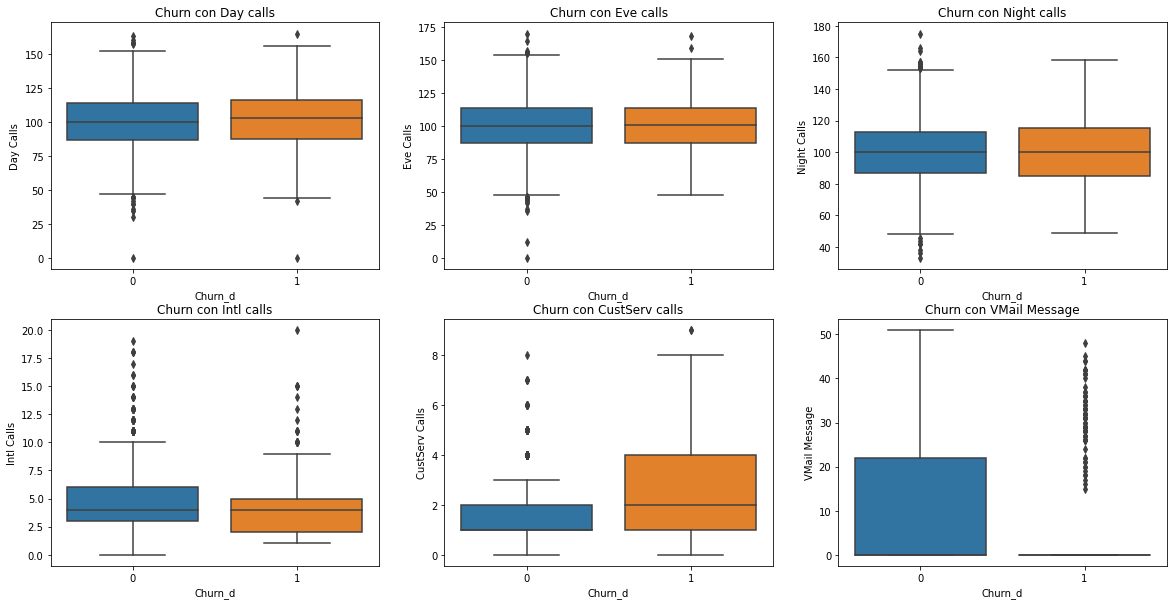

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
sns.boxplot(data=data, x="Churn_d", y="Day Calls", ax=axes[0,0])
axes[0,0].set_title("Churn con Day calls")
sns.boxplot(data=data, x="Churn_d", y="Eve Calls",  ax=axes[0,1])
axes[0,1].set_title("Churn con Eve calls")
sns.boxplot(data=data, x="Churn_d", y="Night Calls",  ax=axes[0,2])
axes[0,2].set_title("Churn con Night calls")
sns.boxplot(data=data, x="Churn_d", y="Intl Calls",  ax=axes[1,0])
axes[1,0].set_title("Churn con Intl calls")
sns.boxplot(data=data, x="Churn_d", y="CustServ Calls",  ax=axes[1,1])
axes[1,1].set_title("Churn con CustServ calls")
sns.boxplot(data=data, x="Churn_d", y="VMail Message",  ax=axes[1,2])
axes[1,2].set_title("Churn con VMail Message")


Las variables de plan con servicio de mensaje y plan con servicio de llamadas internacionales parecen tener cierta relación con la variable Churn, denotandose en las proporciones que presenta sus dos opciones con respecto a esta ultima. Con respecto a las variables numericas, al existir una correlación perfecta entre el charge y los minutos del plan, se revisa el numero de llamadas para cada aspecto, denotando cierta diferencia en las llamadas de servicio al cliente y la cantidad de mensajes virutales.

Se seleccionan las dos variables dicotomicas, Vmail plan e Intl plan, y la variable numerica CustServ calls


In [13]:
data['VMail Plan']=data['VMail Plan'].map({'no':0, 'yes':1})
data['Int\'l Plan']=data['Int\'l Plan'].map({'no':0, 'yes':1})

In [14]:
data.head(
)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Churn_d,Churn_pred
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,0


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['VMail Plan','Int\'l Plan','CustServ Calls']
X = data[feature_cols]
y = data.Churn_d
logreg.fit(X, y)
data['Churn_pred'] = logreg.predict(X)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Churn_d,Churn_pred
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,1
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,1


In [16]:
sum(data['Churn_pred'])

116

In [17]:
feature_cols, logreg.coef_, logreg.intercept_

(['VMail Plan', "Int'l Plan", 'CustServ Calls'],
 array([[-0.83644643,  1.94761192,  0.44379661]]),
 array([-2.69294527]))

**Interpretación**: 
- Al tener en 0 las demas variables, las probabilidades logaritmicas de "Churn" se reducen en 2.69294527
- Un aumento de 1 unidad en "CustServ Calls" se asocia con un aumento de 0.44379661 unidades en las probabilidades logarítmicas de "Churn".
- Las probabilidades logartimicas de Churn para un ususario tienen un plan internacional, son 1.94761192 unidades mas altas
- Las probabilidades logartimicas de Churn para un ususario tienen un plan de Vmail, son 0.83644643 unidades mas bajas

## Ejercicio 4.10

Utilizando las 3 variables independientes del punto anterior, particione la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión logística usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule la precisión de test y la precisión de validación(10% restante) y compare los modelos.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.10, random_state=1)

In [24]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, random_state=666, shuffle=True)
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
print('Precisión:', np.mean(scores))

Precisión: 0.5285714285714286


In [25]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True)
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
print('Precisión:', np.mean(scores))

Precisión: 0.5352240151775756


In [26]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
print('Precisión:', np.mean(scores))

Precisión: 0.5263719124013242


No existe mucha diferencia entre los diferentes metodos del

In [34]:
from sklearn.metrics import precision_score
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_validation)
precision_score(y_validation, y_pred, average='macro')

0.4